# PHASE I PROJECT

 # Topic : Niche Identifucation for Microsoft Movie Production

## Objective of the project
The main objective of the project is to identify movie genres on demand for the purpose of investing in production industry.

## Problem Statement 
Movie production is a large capital investment; like any other investiment, it comes with a potential risk. Choice of a the type of movie to invest in is important to avoid capital loss. In order to mitigate the risk, it is important to have analytical insight on the movie market behaviour. Understand the most viewed genre to capature more customers. Thus making a profitable business 

In [10]:
import pandas as pd 
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Understanding
The data provides has historical information from different movie producton studio, the rating of the movies, actors, generes, cost of proction and the revenue both from offshore and domestic.The data set will suited for the project. All the requred data set are avalable. Further, the date set is large enough to provide accurate infomation 
.

In [11]:
!ls

Microsoft-MovieProduction.ipynb
README.md
bom.movie_gross.csv
bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
learn-co-curriculum dsc-phase-1-project master zippedData.zip
name.basics.csv
rt.movie_info.tsv
rt.movie_info.tsv.gz
rt.reviews.tsv
rt.reviews.tsv.gz
title.akas.csv
title.basics.csv
title.crew.csv
title.principals.csv
title.ratings.csv
tmdb.movies.csv
tmdb.movies.csv.gz
tn.movie_budgets.csv
tn.movie_budgets.csv.gz


In [12]:
Revenue_File= pd.read_csv("bom.movie_gross.csv.gz",)
Budget_file= pd.read_csv("tn.movie_budgets.csv")
df3=pd.read_csv("name.basics.csv")
Genre_File=pd.read_csv("title.basics.csv")
df6=pd.read_csv("title.crew.csv")
df7=pd.read_csv("title.principals.csv")
Movie_rating=pd.read_csv("title.ratings.csv")
Movie_vote=pd.read_csv("tmdb.movies.csv")



In [13]:
Budget_file.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Revenue_File
This file has key element which investore need to know. the cost of production and the revenue collected from both domestic amd offshore customer. it will be important for market target as well

In [14]:
Revenue_File.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [15]:
#df3.head()
Revenue_File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Genre_File
This file has grenre of the movies, thus will be used for categorizing data,.

In [16]:
Genre_File.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [17]:
#df6.head()

In [18]:
#df7.head()

### Movie_rating
This file provide viewers satisfiction on the movie content. Thus it is necessary for a microsoft to understand the type of movie to bet on. 

In [19]:
Movie_rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
Movie_vote.head() # Tabele contain vote rating for the movies which is import to understand the customers likes and dislikes 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [21]:
Movie_vote[['id','title','vote_average']]

,id,title,vote_average
0,12444,Harry Potter and the Deathly Hallows: Part 1,7.7
1,10191,How to Train Your Dragon,7.7
2,10138,Iron Man 2,6.8
3,862,Toy Story,7.9
4,27205,Inception,8.3
...,...,...,...
26512,488143,Laboratory Conditions,0.0
26513,485975,_EXHIBIT_84xxx_,0.0
26514,381231,The Last One,0.0
26515,366854,Trailer Made,0.0


In [23]:
Revenue_File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


##### Converting foreign_gross data type from object to a float.

In [31]:
for x in Revenue_File:
    Revenue_File['foreign_gross'].str.replace(',',"")
    for x in Revenue_File:
        Revenue_File['foreign_gross'].str.replace('$',"")

Revenue_File['foreign_gross'] = Revenue_File['foreign_gross'].str.replace(',',"").astype(float)


C:\Users\Thomas.Okiwi\AppData\Local\Temp\ipykernel_10944\1572537994.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Revenue_File['foreign_gross'].str.replace('$',"")


In [ ]:
# Revenue_File['foreign_gross'] = Revenue_File['foreign_gross'].str.replace(',',"").astype(float)

In [24]:
Revenue_File['domestic_gross'].describe()


count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [30]:
Revenue_File['domestic_gross'].mean()

28745845.06698422

### Identiying Missing Values in the Files 

In [ ]:
Revenue_File.isna().sum()

In [ ]:
Budget_file.isna().sum().sum()

In [ ]:
Genre_File.isna().sum().sum()

In [ ]:
Movie_rating.isna().sum().sum()

In [ ]:
Movie_vote.isna().sum().sum()

### Finxing Missing Values 

#### Finding the midian values for columns domestic_gross and  foreign_gross in "Revenue_File"

In [32]:
domestic_median = Revenue_File['domestic_gross'].median()  
foreign_median = Revenue_File['foreign_gross'].median()                     

#### Replacing the mising values in in the "Revenue_File" and renaming it to Revenue_File_C not to change the original content

In [33]:
Revenue_File_C=Revenue_File.fillna({'domestic_gross':'domestic_median',
                                    'foreign_gross':'foreign_median'
                                   })
Revenue_File_C.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [34]:
Revenue_File_C.isna().sum() 

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [ ]:
Genre_File

Revenue_File.isna().sum()

In [36]:
for x in Budget_file:
    Budget_file['production_budget'] = Budget_file['production_budget'].str.replace(',',"")
    for x in Budget_file:
        Budget_file['production_budget'] = Budget_file['production_budget'].str.replace('$',"")
        for x in Budget_file:
            Budget_file['worldwide_gross'] = Budget_file['worldwide_gross'].str.replace(',',"")
            for x in Budget_file:
                Budget_file['worldwide_gross'] = Budget_file['worldwide_gross'].str.replace('$',"")
                for x in Budget_file:
                    Budget_file['domestic_gross'] = Budget_file['domestic_gross'].str.replace('$',"")
                    for x in Budget_file:
                        Budget_file['domestic_gross'] = Budget_file['domestic_gross'].str.replace(',',"")
            
        

Budget_file['production_budget'] = Budget_file['production_budget'].str.replace(',',"").astype(float)
Budget_file['worldwide_gross'] = Budget_file['worldwide_gross'].str.replace('$',"").astype(float)
Budget_file['domestic_gross'] = Budget_file['domestic_gross'].str.replace('',"").astype(float)







C:\Users\Thomas.Okiwi\AppData\Local\Temp\ipykernel_10944\1673971265.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Budget_file['production_budget'] = Budget_file['production_budget'].str.replace('$',"")
C:\Users\Thomas.Okiwi\AppData\Local\Temp\ipykernel_10944\1673971265.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Budget_file['worldwide_gross'] = Budget_file['worldwide_gross'].str.replace('$',"")
C:\Users\Thomas.Okiwi\AppData\Local\Temp\ipykernel_10944\1673971265.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=T

In [38]:
Budget_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [41]:
for x in Budget_file:
    production_Meadian=Budget_file['production_budget'].median()
    for x in Budget_file:
        domestic_Meadian=Budget_file['domestic_gross'].median()
        for x in Budget_file:
            worldwide_Meadian=Budget_file['worldwide_gross'].median() 
            
        
        
    





#production_Meadian=Budget_file['production_budget'].median()
#domestic_Meadian=Budget_file['domestic_gross'].median()
#worldwide_Meadian=Budget_file['worldwide_gross'].median() 

#### Removing comma"," and "$" from the columuns :production_budget,domestic_gross and worldwide_gross gross then converting the colunms into float

#### Replacing the mising values in in the "Budget_file" and renaming it to Budget_file_C not to change the original content 

In [42]:
Budget_file_C=Budget_file.fillna({'production_budget':'production_Meadian',
                                    'domestic_gross':'domestic_Meadian',
                                  'worldwide_gross': 'worldwide_Meadian'
                                   })
Budget_file_C


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


### Caculatiting the profit of producing a movie 

In [43]:
gross_Income=Budget_file_C[['domestic_gross','worldwide_gross']].sum(axis=1) # Adding a culumn to sum worldide gross and dome


In [44]:
Budget_file_C['gross_Income']=gross_Income

In [45]:
Budget_file_C

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_Income
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.889770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2.676000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00


In [46]:
Profit=Budget_file_C['gross_Income']-Budget_file_C['production_budget']

In [47]:
Budget_file_C['Profit']=Profit

In [48]:
Budget_file_C

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_Income,Profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.889770e+05,2.829770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2.676000e+03,-2.324000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,-1.400000e+03


### Dropong Null valuues in the genre columnn of Genre_File and remaming it to Genre_File_C, to retain the original content 

In [49]:
Genre_File_C=Genre_File.dropna(subset=['genres'])


In [50]:
Genre_File_C.isna().sum()

tconst                 0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

## Checking for duplicates

In [51]:
duplicates = Budget_file[Budget_file.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [52]:
duplicates = Revenue_File_C[Revenue_File_C.duplicated()]
print(len(duplicates))
duplicates.head()

0


,title,studio,domestic_gross,foreign_gross,year


In [53]:

duplicates = Movie_vote[Movie_vote.duplicated()]
print(len(duplicates))
duplicates.head()

0


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count


In [54]:

duplicates =Genre_File[Genre_File.duplicated()]
print(len(duplicates))
duplicates.head()

0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [55]:

duplicates =Movie_rating[Movie_rating.duplicated()]
print(len(duplicates))
duplicates.head()

0


,tconst,averagerating,numvotes


## Joining Grenre and Rating filles 

In [56]:
Genre_rating=pd. merge(Genre_File,Movie_rating,on="tconst")

In [57]:
Genre_rating

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


## Data Analysis 

#### Finding the average of ratings per genre

In [58]:
Genre_rating_Mean=Genre_rating.groupby('genres').mean()

C:\Users\Thomas.Okiwi\AppData\Local\Temp\ipykernel_10944\3547460564.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Genre_rating_Mean=Genre_rating.groupby('genres').mean()


In [59]:
Genre_rating_Mean

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
Action,2014.271706,103.201110,5.757712,336.115424
"Action,Adult,Comedy",2014.000000,71.000000,4.650000,18.000000
"Action,Adventure",2014.205882,105.354839,5.223529,1603.102941
"Action,Adventure,Animation",2014.676647,92.981013,6.562874,21380.497006
"Action,Adventure,Biography",2015.047619,105.500000,7.061905,47604.809524
...,...,...,...,...
Thriller,2014.702251,94.880435,5.704244,283.320900
"Thriller,War",2013.250000,88.750000,5.650000,1791.500000
"Thriller,Western",2013.250000,95.000000,7.150000,3322.000000


In [60]:
Genre_rating_Mean.shape

(923, 4)

In [75]:
Top_Rated_Genres=Genre_rating_Mean.nlargest(8, columns=['averagerating'],keep='first')
Top_Rated_Genres

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
"Comedy,Documentary,Fantasy",2015.0,70.0,9.4,5.0
"Documentary,Family,Musical",2017.0,59.0,9.3,19.0
"History,Sport",2016.0,NaN,9.2,5.0
Game-Show,2013.0,130.0,9.0,7.0
"Music,Mystery",2012.0,NaN,9.0,5.0
"Comedy,Drama,Reality-TV",2016.0,NaN,8.8,15.0
"Documentary,News,Reality-TV",2014.0,61.0,8.8,8.0
"Documentary,News,Sport",2017.0,85.0,8.8,25.0


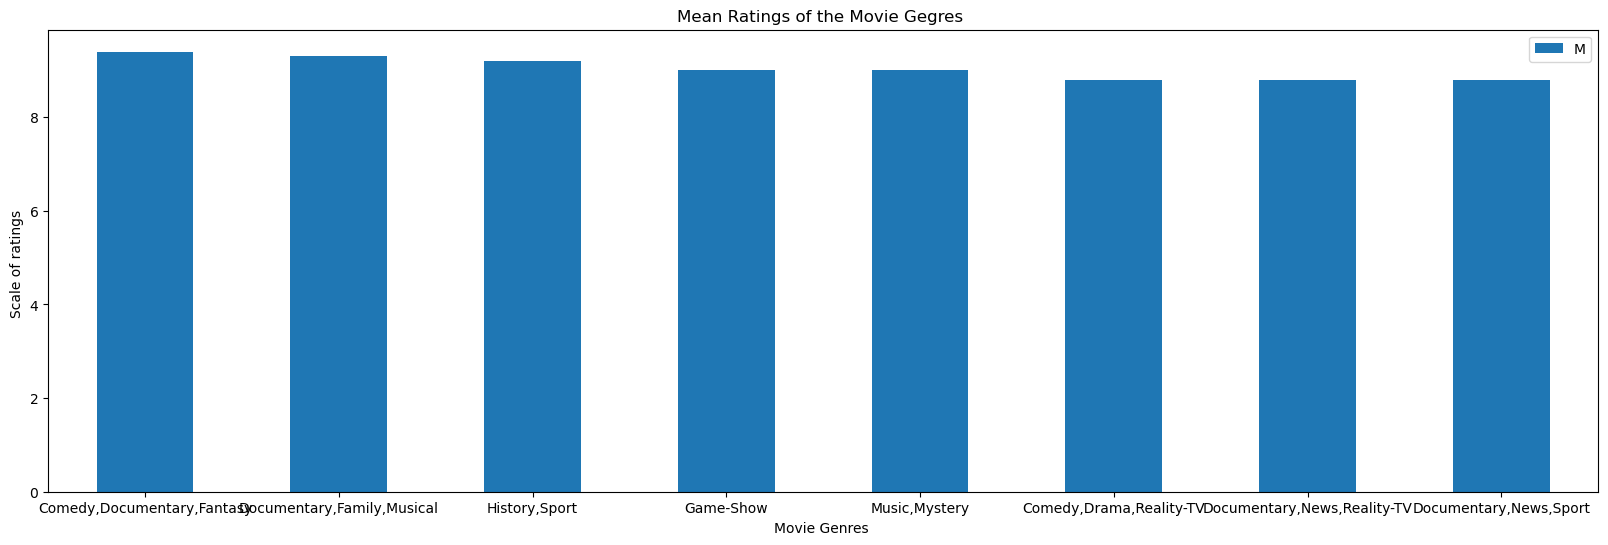

In [65]:
Top_Rated_Genres.plot.bar(y='averagerating', rot=0)
plt.title ('Mean Ratings of the Movie Gegres ')
plt.xlabel ('Movie Genres ')
plt.ylabel ('Scale of ratings ')
plt.legend ('Mean Movie Ratings ')
plt .rcParams['figure.figsize']=(20,6)
plt. show()

In [64]:
plt .rcParams['figure.figsize']=(20,6)

In [66]:
Budget_file.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [ ]:
Genre_rating.head()

In [67]:
Genre_rating_Rename=Genre_rating.rename(columns={'primary_title':'movie'})
Genre_rating_Rename

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [77]:
Genre_Budget=pd. merge(Budget_file_C,Genre_rating_Rename,on="movie")

In [ ]:
Genre_Budget.info()

In [78]:
Profit= Genre_Budget[['genres','averagerating','Profit']]
Profit

,genres,averagerating,Profit
0,Horror,6.1,3.111853e+09
1,"Action,Adventure,Fantasy",6.6,8.761278e+08
2,"Action,Adventure,Sci-Fi",6.0,-1.574753e+08
3,"Action,Adventure,Sci-Fi",7.3,1.531420e+09
4,"Action,Adventure,Sci-Fi",8.5,2.426950e+09
...,...,...,...
2870,Drama,7.5,-1.500000e+04
2871,Drama,4.9,1.791920e+05
2872,"Comedy,Drama",6.4,1.680000e+02
2873,"Horror,Sci-Fi,Thriller",5.6,-7.000000e+03


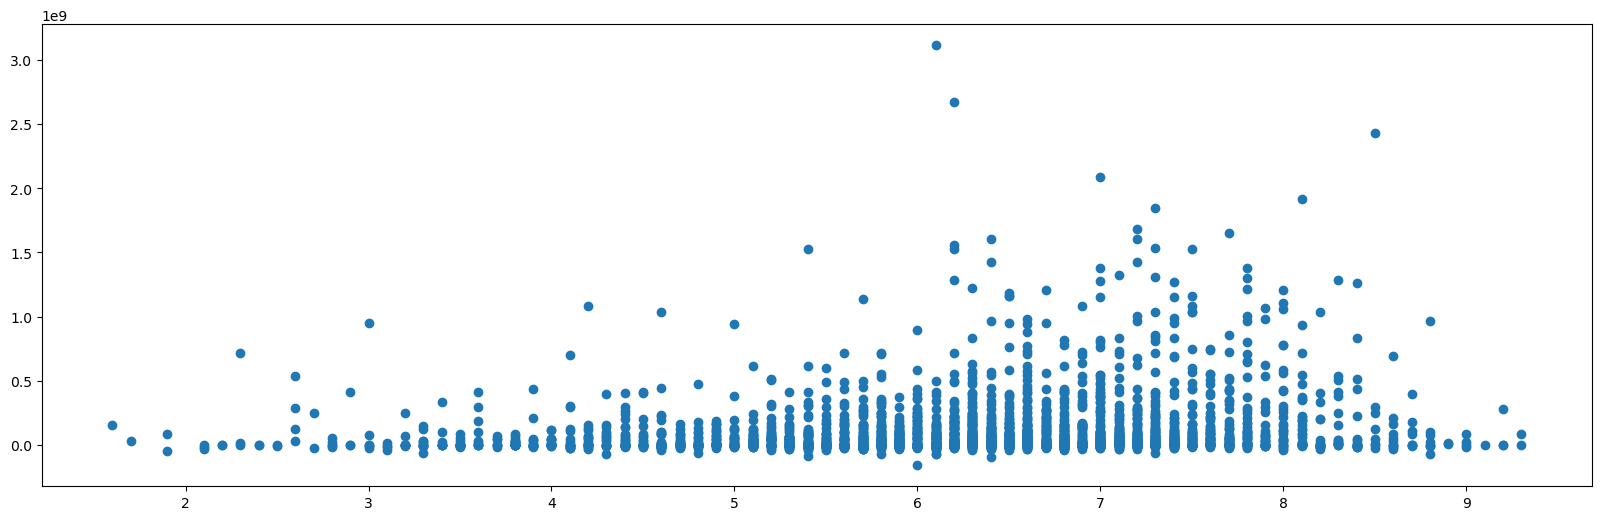

In [70]:
Profit=plt.scatter(Profit['averagerating'], Profit['Profit'])

## Finding the correlation between the number of ratings and the profit

In [71]:
Genre_Budget.corr()

C:\Users\Thomas.Okiwi\AppData\Local\Temp\ipykernel_10944\3773265350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Genre_Budget.corr()


,id,production_budget,domestic_gross,worldwide_gross,gross_Income,Profit,start_year,runtime_minutes,averagerating,numvotes
id,1.000000,-0.046256,-0.005244,-0.020881,-0.016871,-0.010128,0.017262,-0.037219,0.010373,-0.005445
production_budget,-0.046256,1.000000,0.715272,0.777815,0.769176,0.681901,0.034132,0.246496,0.130967,0.500550
domestic_gross,-0.005244,0.715272,1.000000,0.946496,0.971070,0.969509,0.040294,0.195526,0.177163,0.562929
worldwide_gross,-0.020881,0.777815,0.946496,1.000000,0.996177,0.985831,0.034316,0.208363,0.165675,0.560203
gross_Income,-0.016871,0.769176,0.971070,0.996177,1.000000,0.991922,0.036300,0.207113,0.170551,0.566913
Profit,-0.010128,0.681901,0.969509,0.985831,0.991922,1.000000,0.034774,0.188147,0.169216,0.549531
start_year,0.017262,0.034132,0.040294,0.034316,0.036300,0.034774,1.000000,0.065830,0.053334,-0.088208
runtime_minutes,-0.037219,0.246496,0.195526,0.208363,0.207113,0.188147,0.065830,1.000000,0.211844,0.363359
averagerating,0.010373,0.130967,0.177163,0.165675,0.170551,0.169216,0.053334,0.211844,1.000000,0.311527
numvotes,-0.005445,0.500550,0.562929,0.560203,0.566913,0.549531,-0.088208,0.363359,0.311527,1.000000


###### The correlation between Profit and rating is 0.169216.(positive corelation). This indicates the rating of a moveie buy the viewers has a influece number of customers and thus the revenue fetch

In [79]:
Top_Profit_Genres=Profit.nlargest(8, columns=['Profit'],keep='first')
Top_Profit_Genres

,genres,averagerating,Profit
0,Horror,6.1,3.111853e+09
37,Adventure,6.2,2.667572e+09
4,"Action,Adventure,Sci-Fi",8.5,2.426950e+09
25,"Action,Adventure,Sci-Fi",7.0,2.086125e+09
19,"Action,Adventure,Sci-Fi",8.1,1.916215e+09
36,"Action,Adventure,Sci-Fi",7.3,1.848318e+09
59,"Action,Crime,Thriller",7.2,1.681730e+09
38,"Action,Adventure,Animation",7.7,1.651102e+09


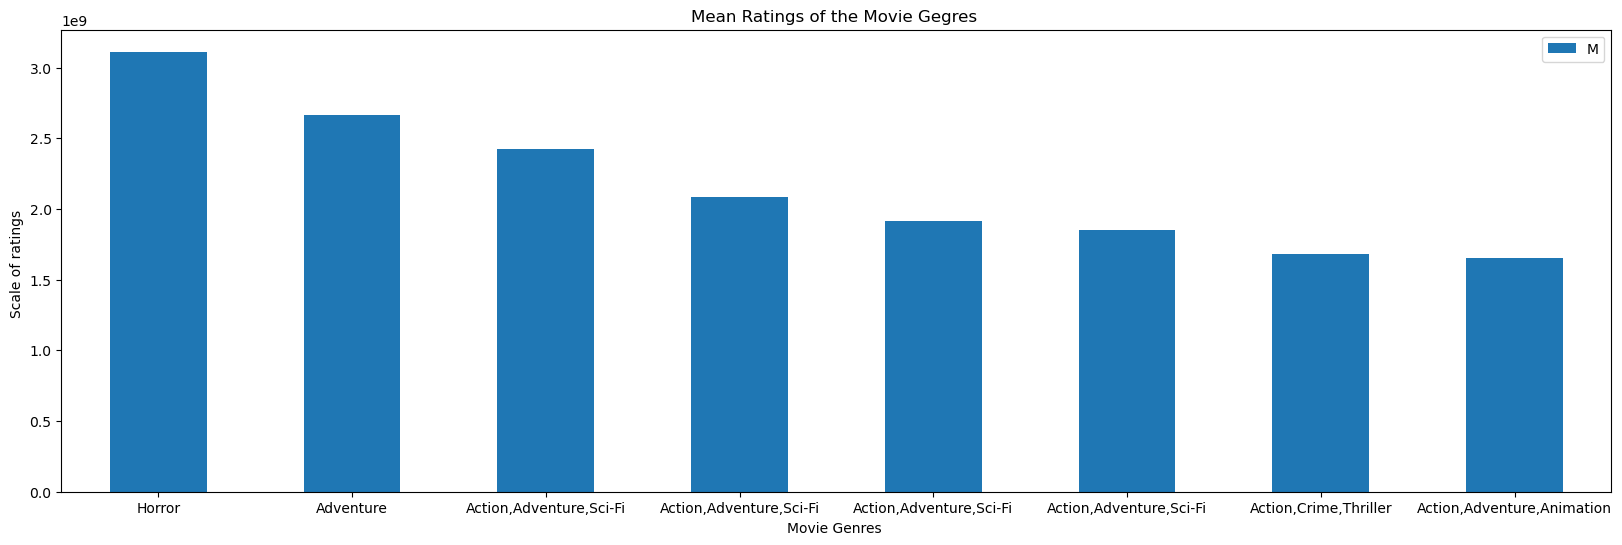

In [80]:
Top_Profit_Genres.plot.bar(x='genres',y='Profit', rot=0)
plt.title ('Mean Ratings of the Movie Gegres ')
plt.xlabel ('Movie Genres ')
plt.ylabel ('Scale of ratings ')
plt.legend ('Mean Movie Ratings ')
plt. show()